### The objective of this project is to cluster pixel values extracted from an image and stored in an Excel document. The aim is to group together similar pixel trios within the same cluster. (NB: each pixel trio represents an RGB code, thus, sections of the image with the same or similar colors should be in the same cluster)

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from skimage import io
import math
from PIL import Image
from pylab import figure

C:\Users\Owner\anaconda3\Lib\site-packages\paramiko\transport.py:219: CryptographyDeprecationWarning: Blowfish has been deprecated
  "class": algorithms.Blowfish,


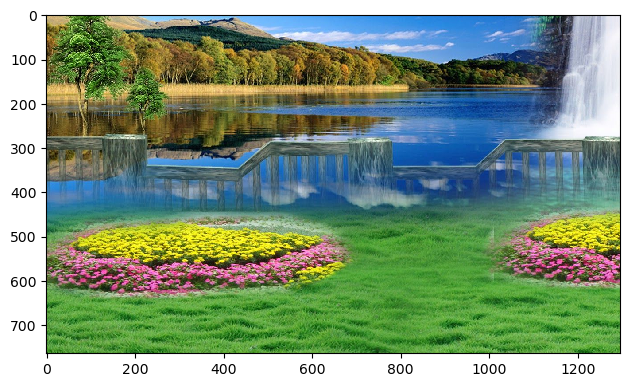

In [2]:
original_image = io.imread('original_image.png')
io.imshow(original_image)

**Read Dataset and allocate each column to a variable**

In [3]:
#Kindly note that this code chunk may take about 40 seconds to run
dataset = pd.read_excel("photo_pixel_data.xlsx",header=None)
arr=dataset.to_numpy()
col1=arr[ :,0]
col2=arr[ :,1]
col3=arr[ :,2]
cols=np.array([col1,col2,col3])

**View Dataset**

In [4]:
dataset.head(10)

,0,1,2
0,215,219,230
1,216,220,231
2,217,221,232
3,217,221,232
4,218,222,234
5,221,225,237
6,222,226,238
7,223,227,239
8,224,228,240
9,226,230,241


In [5]:
print('Length of Dataset: ',len(dataset))

Length of Dataset:  999168


**Choose First Centroid Trio**

In [6]:
c1 = (col1[0],col2[0],col3[0])
centroids = c1
c1
print('The First Centroid Trio (c1) is {}'.format(c1))

The First Centroid Trio (c1) is (215, 219, 230)


**Method to find the Euclidean distances between the current centroids and each pixel trio**

In [7]:
def findEuclidDistances(centroids):
    distancesList=[]
    c=centroids
    col=cols
    for i in range(0,len(col[0]),1):
        euclidDist=abs(math.sqrt(pow(c[0]-col[0][i],2)+pow(c[1]-col[1][i],2)+pow(c[2]-col[2][i],2)))
        distancesList.append(euclidDist)
    return distancesList

**Find C2 Centroids**

In [8]:
euclidDistances = findEuclidDistances(c1)
maxEuclidDist = max(euclidDistances)
index = euclidDistances.index(maxEuclidDist)
colArray=cols
c2=[colArray[0][index],colArray[1][index],colArray[2][index]]
c2
print('The Second Centroid Trio (c2) is {}'.format(c2))

The Second Centroid Trio (c2) is [0, 0, 0]


**Find C3 Centroids**

In [9]:
c1Distances = findEuclidDistances(c1)
c2Distances = findEuclidDistances(c2)
minDistList = []
col = cols
for n in range(0,len(col[0])):
    minDistList.append(min(c1Distances[n],c2Distances[n]))
c3minDistanceList=minDistList
minNumIndex=minDistList.index(max(minDistList))
c3=[col[0][minNumIndex],col[1][minNumIndex],col[2][minNumIndex]]
print('The Third Centroid Trio (c3) is {}'.format(c3))

The Third Centroid Trio (c3) is [178, 161, 0]


**Method to find centroids 4-7**

In [10]:
def findNextCentroids(prevCentroidPairs,minDistanceList):
    centroids = prevCentroidPairs
    cDistances = findEuclidDistances(centroids)
    col = cols
    newList=[]
    minDistList = minDistanceList
    for n in range(0,len(col[0])):
        newList.append(min(cDistances[n],minDistList[n]))
    minDistanceList=newList
    minNumIndex=newList.index(max(newList))
    c=[col[0][minNumIndex],col[1][minNumIndex],col[2][minNumIndex]]
    return [c,minDistanceList]

**Find c4 to c7**

In [11]:
c4_centroids_mindistList = findNextCentroids(c3,c3minDistanceList)
c4 = c4_centroids_mindistList[0]
c5_centroids_mindistList = findNextCentroids(c4, c4_centroids_mindistList[1] )
c5 = c5_centroids_mindistList[0]
c6_centroids_mindistList = findNextCentroids(c5, c5_centroids_mindistList[1])
c6 = c6_centroids_mindistList[0]
c7_centroids_mindistList = findNextCentroids(c6, c6_centroids_mindistList[1])
c7 = c7_centroids_mindistList [0] 


**Print out centroids**

In [12]:
centroids=[c1,c2,c3,c4,c5,c6,c7]
print('Centroids c1 to c7: ')
print(centroids)

Centroids c1 to c7: 
[(215, 219, 230), [0, 0, 0], [178, 161, 0], [21, 105, 201], [211, 30, 135], [255, 255, 89], [51, 123, 59]]


**Method to find the indexes of the pixel trios in each cluster**

In [13]:
c=centroids
col=cols
indexes=[]
for i in range(0, len(col[0])):
    row=[col[0][i],col[1][i],col[2][i]]
    
    #find the euclidean distance between each centroid and pixel trio i
    euclidDist1=abs(math.sqrt(pow(c[0][0]-col[0][i],2)+pow(c[0][1]-col[1][i],2)+pow(c[0][2]-col[2][i],2)))
    euclidDist2=abs(math.sqrt(pow(c[1][0]-col[0][i],2)+pow(c[1][1]-col[1][i],2)+pow(c[1][2]-col[2][i],2)))
    euclidDist3=abs(math.sqrt(pow(c[2][0]-col[0][i],2)+pow(c[2][1]-col[1][i],2)+pow(c[2][2]-col[2][i],2)))
    euclidDist4=abs(math.sqrt(pow(c[3][0]-col[0][i],2)+pow(c[3][1]-col[1][i],2)+pow(c[3][2]-col[2][i],2)))
    euclidDist5=abs(math.sqrt(pow(c[4][0]-col[0][i],2)+pow(c[4][1]-col[1][i],2)+pow(c[4][2]-col[2][i],2)))
    euclidDist6=abs(math.sqrt(pow(c[5][0]-col[0][i],2)+pow(c[5][1]-col[1][i],2)+pow(c[5][2]-col[2][i],2)))
    euclidDist7=abs(math.sqrt(pow(c[6][0]-col[0][i],2)+pow(c[6][1]-col[1][i],2)+pow(c[6][2]-col[2][i],2)))
    
    euclids=[euclidDist1,euclidDist2,euclidDist3,euclidDist4,euclidDist5,euclidDist6,euclidDist7]
    '''find the minimum of all the Euclidean distances at pixel trio i and 
    determine which cluster it pertains to'''
    index=euclids.index(min(euclids))
    
    '''Add the index to the list of indexes representing the cluster each pixel trio belongs to
    If the pixel trio belongs to cluster 5, 4 will be added to the indexes list at 
    the exact location of the pixel trio in the dataset - the "indexes" list will be the same length as the dataset'''
    indexes.append(index)

In [14]:
print(indexes[:10])
print('Length of "indexes" list: ', len(indexes))

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
Length of "indexes" list:  999168


**Allocate a color to each cluster**

In [15]:
cluster_colors=[]
for i in range(0, len(cols[0])):
    if indexes[i]==0:
        cluster_colors.append([210,210,210])
    elif indexes[i]==1:
        cluster_colors.append([8,28,5])
    elif indexes[i]==2:
        cluster_colors.append([255,255,0])
    elif indexes[i]==3:
        cluster_colors.append([15,94,156])
    elif indexes[i]==4:
        cluster_colors.append([191, 64, 191])
    elif indexes[i]==5:
        cluster_colors.append([240,230,140])
    else:
        cluster_colors.append([104,191,4])

In [16]:
cluster_colors[:10]

[[210, 210, 210],
 [210, 210, 210],
 [210, 210, 210],
 [210, 210, 210],
 [210, 210, 210],
 [210, 210, 210],
 [210, 210, 210],
 [210, 210, 210],
 [210, 210, 210],
 [210, 210, 210]]

**Create a new image with each cluster being represented by its alloted color**

Text(0.5, 1.0, 'Image Showing Clusters')

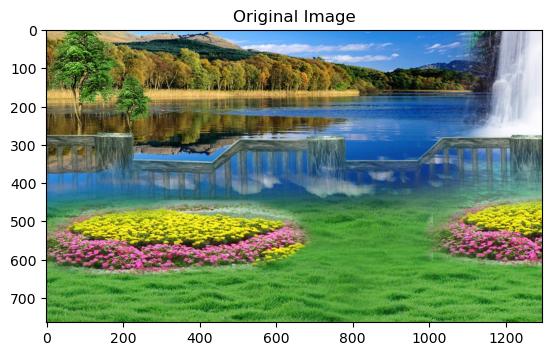

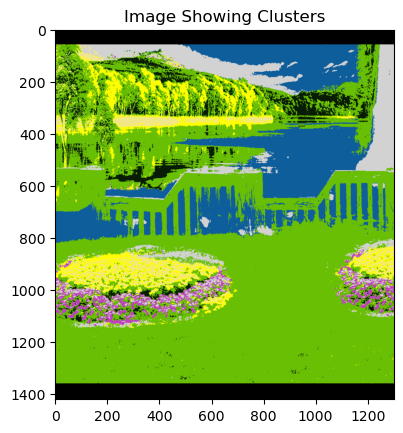

In [17]:
finalArray = np.array(cluster_colors)

imgDimensionsArray = np.zeros((1301, 768, 3), dtype=np.uint8)

for k in range(imgDimensionsArray.shape[0]):
    for n in range(imgDimensionsArray.shape[1]):
        imgDimensionsArray[k, n] = finalArray[k * imgDimensionsArray.shape[1] + n]
    
clustered_image = Image.fromarray(imgDimensionsArray)
clustered_image.save("clustered_image.png")

clustered_image = Image.open('clustered_image.png')
clustered_image= clustered_image.resize((1301,1420))
clustered_image= clustered_image.rotate(270)

figure(0)
plt.imshow(original_image)
plt.title("Original Image")


orig_img=io.imread("original_image.png")
figure(1)
plt.imshow(clustered_image)
plt.title("Image Showing Clusters")

